<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png' /> </a>

All cells must be suitably commented / documented.

### Read Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Handle Categorical Values

# EDA:

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [5]:
train_df.shape

(614, 13)

In [6]:
train_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [7]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

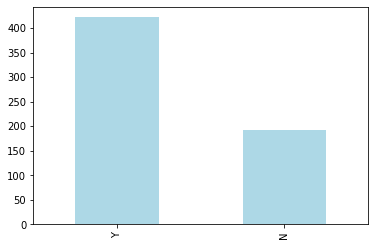

In [8]:
train_df['Loan_Status'].value_counts().plot(kind='bar',color="lightblue")

In [9]:
train_df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [10]:
train_df['Credit_History'].unique()

array([ 1.,  0., nan])

In [11]:
pd.crosstab(train_df.Loan_Status,train_df.Credit_History, normalize=True)

Credit_History,0.0,1.0
Loan_Status,,
N,0.145390,0.171986
Y,0.012411,0.670213


#### 67 % of customers take loan and have credit history

In [12]:
pd.crosstab(train_df.Loan_Status,train_df.Credit_History, normalize='columns')

Credit_History,0.0,1.0
Loan_Status,,
N,0.921348,0.204211
Y,0.078652,0.795789


#### Nearly 80 % of customers that have credit history take loan, Significant

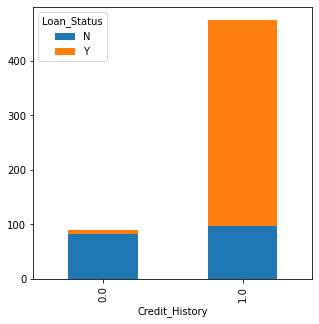

In [13]:
pd.crosstab(index=train_df["Credit_History"], columns=train_df["Loan_Status"]).plot(kind="bar",figsize=(5,5),stacked=True)

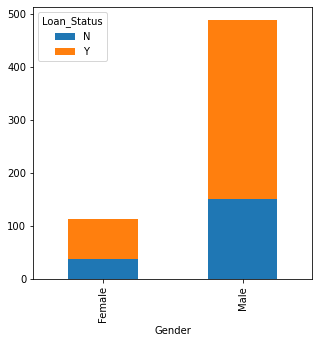

In [14]:
pd.crosstab(train_df.Gender,train_df.Loan_Status).plot(kind='bar',figsize=(5,5),stacked=True)

In [15]:
pd.crosstab(train_df.Gender,train_df.Loan_Status,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [16]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### Males and Females have slight chances rate to take a loan and About 80 % of customers are males.

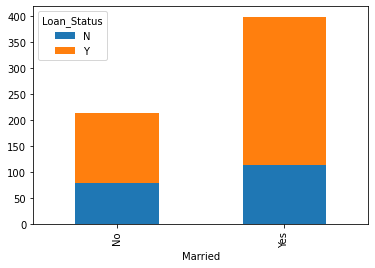

In [17]:
pd.crosstab(train_df.Married,train_df.Loan_Status).plot(kind='bar',stacked=True)

In [18]:
pd.crosstab(train_df.Married,train_df.Loan_Status,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


#### 50 % of customer are Married , also to be married ,you have 10 % more chance to take loan. significant

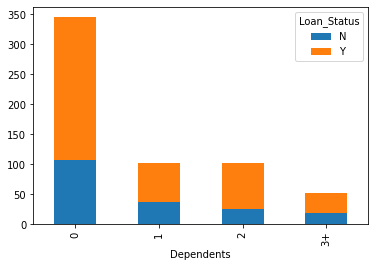

In [19]:
pd.crosstab(train_df.Dependents,train_df.Loan_Status).plot(kind='bar',stacked=True)

In [20]:
pd.crosstab(train_df.Dependents,train_df.Loan_Status,normalize='index')

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


##### Bank does not give any speacial consideration(1 or 3+)dependents ,but does with other (0 or 2)

#### good significance and may be it's related to customer job or age

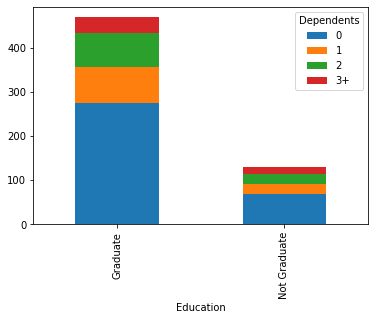

In [21]:
pd.crosstab(train_df.Education,train_df.Dependents).plot(kind='bar',stacked=True)

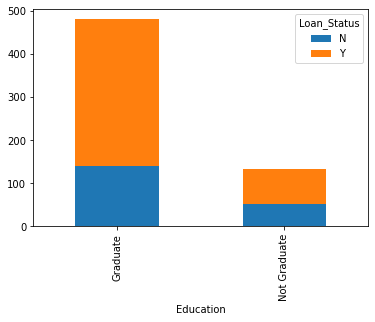

In [22]:
pd.crosstab(train_df.Education,train_df.Loan_Status).plot(kind='bar',stacked=True)

In [23]:
pd.crosstab(train_df.Education,train_df.Loan_Status,normalize='index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


#### if client is graduate ,it has 10 % more than not gratudate to take loan , so it's significant

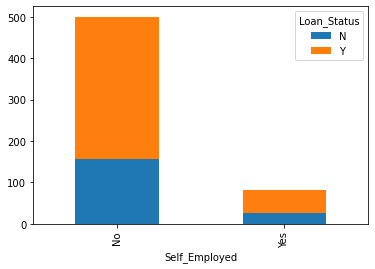

In [24]:
pd.crosstab(train_df.Self_Employed,train_df.Loan_Status).plot(kind='bar',stacked=True)

In [25]:
pd.crosstab(train_df.Self_Employed,train_df.Loan_Status,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


#### Same chance to take loan for employed or not , NOT significant :(

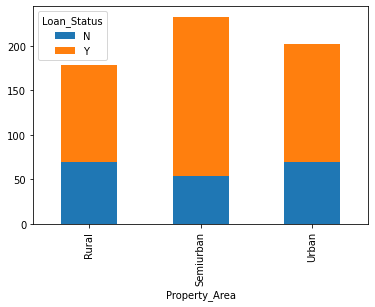

In [26]:
pd.crosstab(train_df.Property_Area,train_df.Loan_Status).plot(kind='bar',stacked=True)

In [27]:
pd.crosstab(train_df.Loan_Status,train_df.Property_Area,normalize='columns')

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


#### Different Areas have slight changes on loan , it might be significant

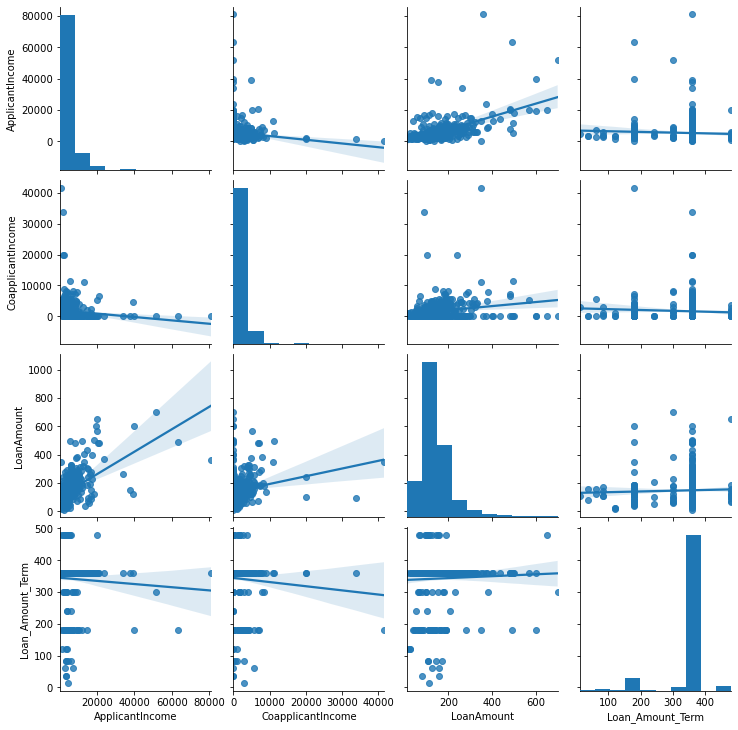

In [28]:
sns.pairplot(train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].dropna(),kind="reg")

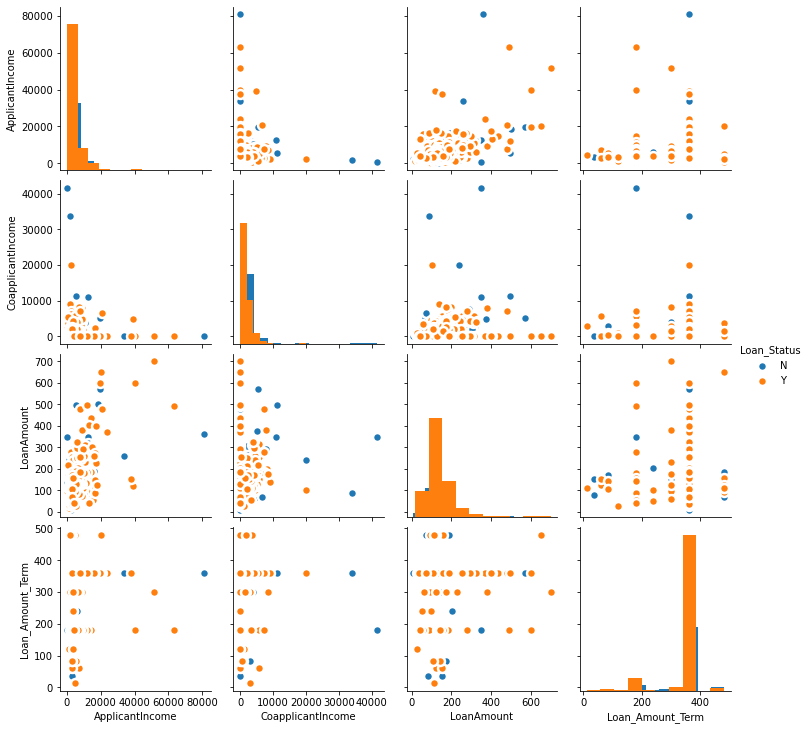

In [29]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']].dropna(), diag_kind="hist", hue="Loan_Status", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

1) Applicant income and coapplicant income looks have some similarities, so we could add both together as total income.

2)we could figure out classification boundries between variables, as ex: loan(Y):income >0 and <=2500 ,also loan amount >0 and <450.

3)All numarical variables histograms(alone) do not show any groups separations between loan status(y,n)

In [30]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


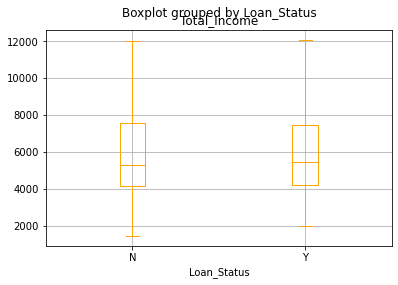

In [31]:
train_df.boxplot(column='Total_Income', by='Loan_Status',showfliers=False ,color="orange")

In [32]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

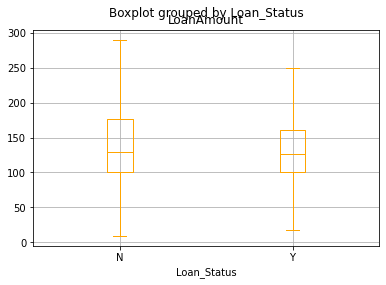

In [33]:
train_df.boxplot(column='LoanAmount', by='Loan_Status',showfliers=False,color="orange")

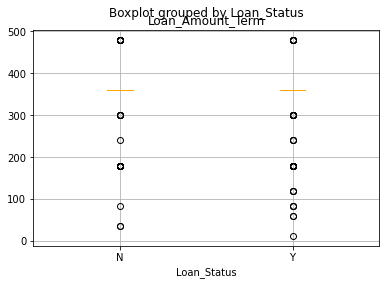

In [34]:
train_df.boxplot(column='Loan_Amount_Term', by='Loan_Status',color="orange")

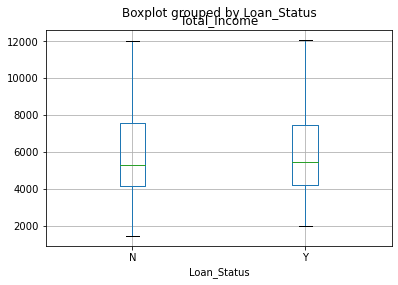

In [35]:
train_df.boxplot(column='Total_Income', by='Loan_Status',showfliers=False)

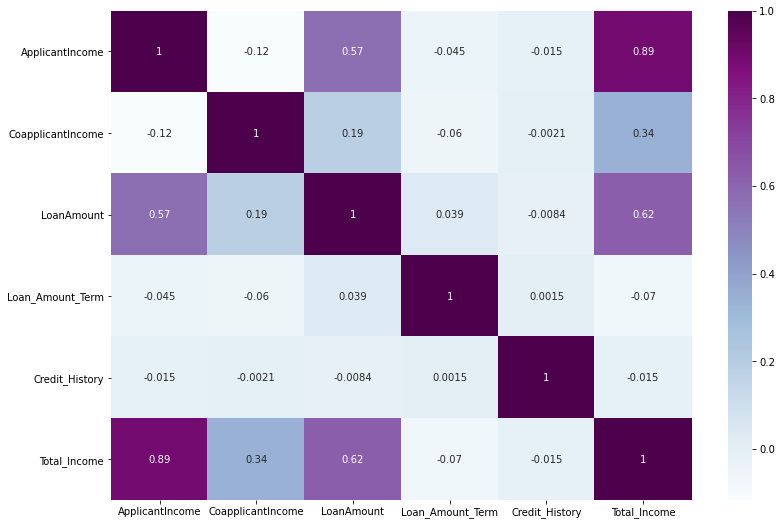

In [36]:
plt.figure(figsize=(13,9))
sns.heatmap(train_df.corr(), annot=True, cmap="BuPu")
plt.show()

### Check for Missing Data

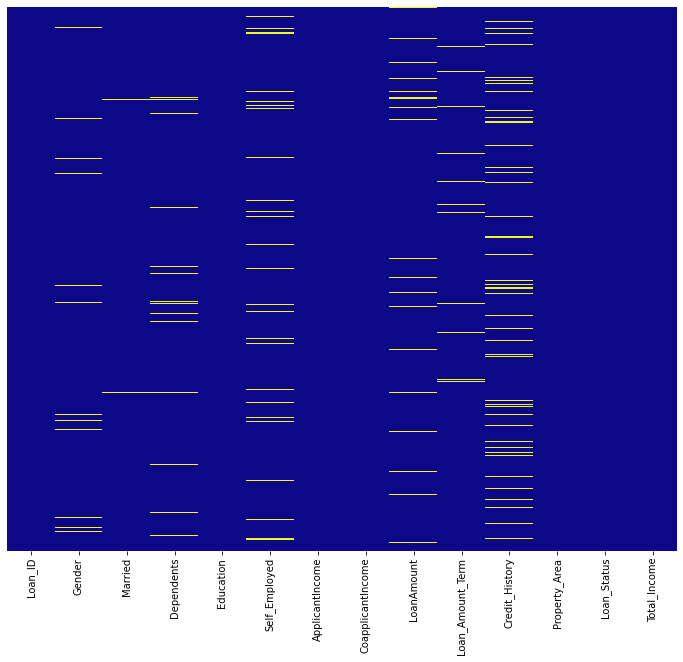

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='plasma')   # creating heatmap for visual analysis

In [38]:
train_df["Gender"]=train_df["Gender"].fillna(train_df["Gender"].mode()[0])
train_df["Married"]=train_df["Married"].fillna(train_df["Married"].mode()[0])
train_df["Dependents"]=train_df["Dependents"].fillna(train_df["Dependents"].mode()[0])
train_df["Self_Employed"]=train_df["Self_Employed"].fillna(train_df["Self_Employed"].mode()[0])
train_df["LoanAmount"]=train_df["LoanAmount"].fillna(train_df["LoanAmount"].mean())
train_df["Loan_Amount_Term"]=train_df["Loan_Amount_Term"].fillna(train_df["Loan_Amount_Term"].mean())
train_df["Credit_History"]=train_df["Credit_History"].fillna(train_df["Credit_History"].mean())
train_df["Loan_Status"]=train_df["Loan_Status"].fillna(train_df["Loan_Status"].mode()[0])

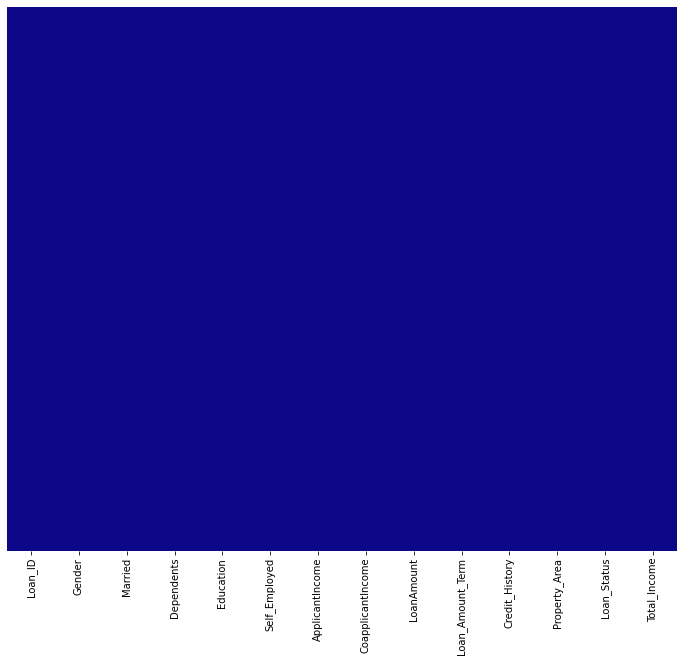

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [40]:
cols=["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Total_Income"]
train_df.drop(columns=cols,inplace=True,axis=1)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y


### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
categories=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status",
"Dependents"]
encoder=LabelEncoder()
for item in categories:
    train_df[item]=encoder.fit_transform(train_df[item])

In [42]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,360.0,1.0,2,1
1,1,1,1,0,0,360.0,1.0,0,0
2,1,1,0,0,1,360.0,1.0,2,1
3,1,1,0,1,0,360.0,1.0,2,1
4,1,0,0,0,0,360.0,1.0,2,1


##### All the Data are transformed to number data fom Categorical data

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    int32  
 8   Loan_Status       614 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 26.5 KB


#### Now all the data is cleared and ready for the training and testing.

### Split Data for Training and Testing

In [44]:
x=train_df.drop(columns=['Loan_Status'],axis=1)
y=train_df['Loan_Status']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train,y_train)
lr_prediction = model.predict(x_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7727272727272727


## Apply different Classification Algorithms and tune them

In [47]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

##### LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


##### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is 72.72727272727273
Cross validation is 72.32040517126481


##### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is 76.62337662337663
Cross validation is 77.03718512594962


##### ExtraTreesClassifier

In [51]:
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy is 72.72727272727273
Cross validation is 74.1090230574437


### Get performance metrics for all the applied classifiers

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
def classify2(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    predict=model.predict(x_test)
    cnf_matrix=confusion_matrix(y_test,predict)
    print(classification_report(y_test,predict))
    sns.heatmap(cnf_matrix,annot=True, cmap="BuPu")

### Visually compare the performance of all classifiers

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



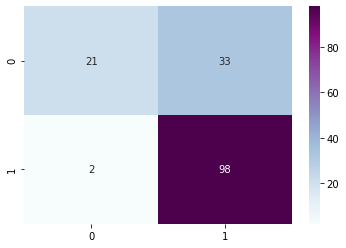

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify2(model, x, y)

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        54
           1       0.76      0.87      0.81       100

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



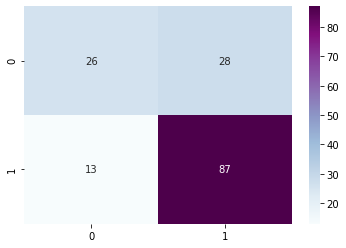

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify2(model, x, y)

              precision    recall  f1-score   support

           0       0.85      0.41      0.55        54
           1       0.75      0.96      0.84       100

    accuracy                           0.77       154
   macro avg       0.80      0.68      0.70       154
weighted avg       0.78      0.77      0.74       154



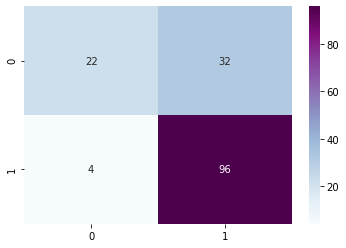

In [56]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify2(model, x, y)

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        54
           1       0.74      0.90      0.81       100

    accuracy                           0.73       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.73      0.71       154



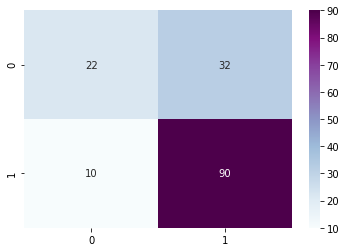

In [57]:
model = ExtraTreesClassifier()
classify2(model, x, y)

#### From the Above ALL Performances LOGISTIC REGRESSION has high ACCURACY in both F1 Score,Support And Also has high  in macroavg, 
#### weighted avg . SO, I will go with choice of LogIstic Regression when compared to other Models......... 

## LOGISTIC REGRESSION Predicted values are :

In [58]:
"y_predicted",lr_prediction

('y_predicted',
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]))

In [59]:
"y_test",y_test

('y_test',
 350    1
 377    1
 163    1
 609    1
 132    1
       ..
 535    1
 468    1
 582    1
 291    0
 75     0
 Name: Loan_Status, Length: 154, dtype: int32)

### The future scope of the Project is to get more details from the Customers like their credit card details, their past transcations amounts and to predict their Loan approval by Automation of AI AND ML MODEL. We can also Use simple UI\UX design wich is connected to the back end of the program and they can check easily about their Loan Approval whether they get Loan or Not.

# PROJECT DONE BY RAHUL_KUMAR_NARRA